# Binary Prediction of Smoker Status using Bio-Signals

by: Jorge Abrego

source: https://www.kaggle.com/competitions/playground-series-s3e24/

## Loaging Modules

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split

%matplotlib inline
warnings.filterwarnings("ignore")

## Importing Data

In [2]:
# Load the data
data = pd.read_csv('../data/train_dataset.csv')

In [3]:
data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
age,35.0,20.0,45.0,45.0,20.0,60.0,40.0,40.0,40.0,45.0,40.0,50.0,50.0,75.0,40.0,60.0,50.0,40.0,40.0,55.0
height(cm),170.0,175.0,155.0,165.0,165.0,160.0,175.0,180.0,170.0,155.0,160.0,155.0,160.0,155.0,150.0,165.0,170.0,175.0,170.0,175.0
weight(kg),85.0,110.0,65.0,80.0,60.0,50.0,90.0,75.0,60.0,55.0,60.0,50.0,60.0,50.0,40.0,75.0,75.0,70.0,65.0,70.0
waist(cm),97.0,110.0,86.0,94.0,81.0,78.0,95.0,85.0,74.0,78.0,77.6,72.0,89.0,71.0,62.0,92.0,84.0,78.5,81.0,85.0
eyesight(left),0.9,0.7,0.9,0.8,1.5,1.0,0.9,1.5,1.2,0.7,0.5,0.5,0.8,0.5,1.0,0.3,1.0,1.5,1.5,1.2
eyesight(right),0.9,0.9,0.9,0.7,0.1,0.9,1.0,1.5,1.5,1.0,0.5,0.8,0.8,0.1,1.5,1.2,1.2,1.0,1.5,1.2
hearing(left),1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
hearing(right),1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
systolic,118.0,119.0,110.0,158.0,109.0,126.0,130.0,110.0,89.0,114.0,130.0,112.0,125.0,114.0,101.0,127.0,120.0,118.0,151.0,110.0
relaxation,78.0,79.0,80.0,88.0,64.0,75.0,88.0,60.0,57.0,81.0,80.0,64.0,76.0,68.0,72.0,84.0,88.0,73.0,103.0,70.0


## Data Preparation

In [4]:
data.shape

(38984, 23)

In [5]:
data.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

Fixing columns names

In [6]:
data.columns = (data
                .columns.str.lower()
                .str.replace("(","_")
                .str.replace(")","")
                .str.replace(" ","_")
                )

Checking if there are null values

In [7]:
data.isna().sum()

age                    0
height_cm              0
weight_kg              0
waist_cm               0
eyesight_left          0
eyesight_right         0
hearing_left           0
hearing_right          0
systolic               0
relaxation             0
fasting_blood_sugar    0
cholesterol            0
triglyceride           0
hdl                    0
ldl                    0
hemoglobin             0
urine_protein          0
serum_creatinine       0
ast                    0
alt                    0
gtp                    0
dental_caries          0
smoking                0
dtype: int64

There aren't null values in this dataset.

Finding duplicated rows

In [8]:
data[data.duplicated()]

,age,height_cm,weight_kg,waist_cm,eyesight_left,eyesight_right,hearing_left,hearing_right,systolic,relaxation,...,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,smoking
701,20,165,60,78.0,0.9,0.2,1,1,110,74,...,69,97,16.5,1,0.7,31,29,18,0,0
1131,50,175,70,78.5,1.5,1.0,1,1,111,73,...,37,159,14.3,1,1.0,28,24,42,0,1
1143,50,160,65,82.0,1.0,1.0,1,1,121,82,...,63,123,14.5,1,1.1,27,22,21,0,0
1232,45,155,45,68.0,0.2,0.2,1,1,110,70,...,40,98,7.1,1,0.5,15,5,12,1,0
1345,25,165,85,92.3,1.2,1.2,1,1,125,76,...,48,79,15.5,1,0.7,26,45,33,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38966,45,160,65,89.2,1.0,0.5,1,1,110,77,...,57,140,13.6,1,0.8,20,15,22,0,0
38968,60,170,70,86.0,1.5,1.5,1,1,135,85,...,55,90,14.9,1,1.0,56,85,32,1,0
38974,30,170,65,72.0,1.2,1.0,1,1,111,77,...,51,100,14.4,1,0.8,22,28,43,1,1
38975,30,180,75,85.0,1.5,1.2,1,1,123,71,...,67,107,16.2,1,0.8,23,24,33,0,1


There are some duplicated values, let's clean them

In [9]:
data.drop_duplicates(keep='first', inplace=True)

In [10]:
data.shape

(33467, 23)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33467 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  33467 non-null  int64  
 1   height_cm            33467 non-null  int64  
 2   weight_kg            33467 non-null  int64  
 3   waist_cm             33467 non-null  float64
 4   eyesight_left        33467 non-null  float64
 5   eyesight_right       33467 non-null  float64
 6   hearing_left         33467 non-null  int64  
 7   hearing_right        33467 non-null  int64  
 8   systolic             33467 non-null  int64  
 9   relaxation           33467 non-null  int64  
 10  fasting_blood_sugar  33467 non-null  int64  
 11  cholesterol          33467 non-null  int64  
 12  triglyceride         33467 non-null  int64  
 13  hdl                  33467 non-null  int64  
 14  ldl                  33467 non-null  int64  
 15  hemoglobin           33467 non-null  floa

## EDA

Describing columns

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,33467.0,44.153943,12.071768,20.0,40.0,40.0,55.0,85.0
height_cm,33467.0,164.684465,9.195867,130.0,160.0,165.0,170.0,190.0
weight_kg,33467.0,65.930319,12.877955,30.0,55.0,65.0,75.0,135.0
waist_cm,33467.0,82.081501,9.310533,51.0,76.0,82.0,88.0,129.0
eyesight_left,33467.0,1.013849,0.496245,0.1,0.8,1.0,1.2,9.9
eyesight_right,33467.0,1.009553,0.497867,0.1,0.8,1.0,1.2,9.9
hearing_left,33467.0,1.025368,0.157243,1.0,1.0,1.0,1.0,2.0
hearing_right,33467.0,1.026056,0.159303,1.0,1.0,1.0,1.0,2.0
systolic,33467.0,121.498730,13.671019,71.0,112.0,120.0,130.0,233.0
relaxation,33467.0,76.017599,9.672070,40.0,70.0,76.0,82.0,146.0


Columns distributions

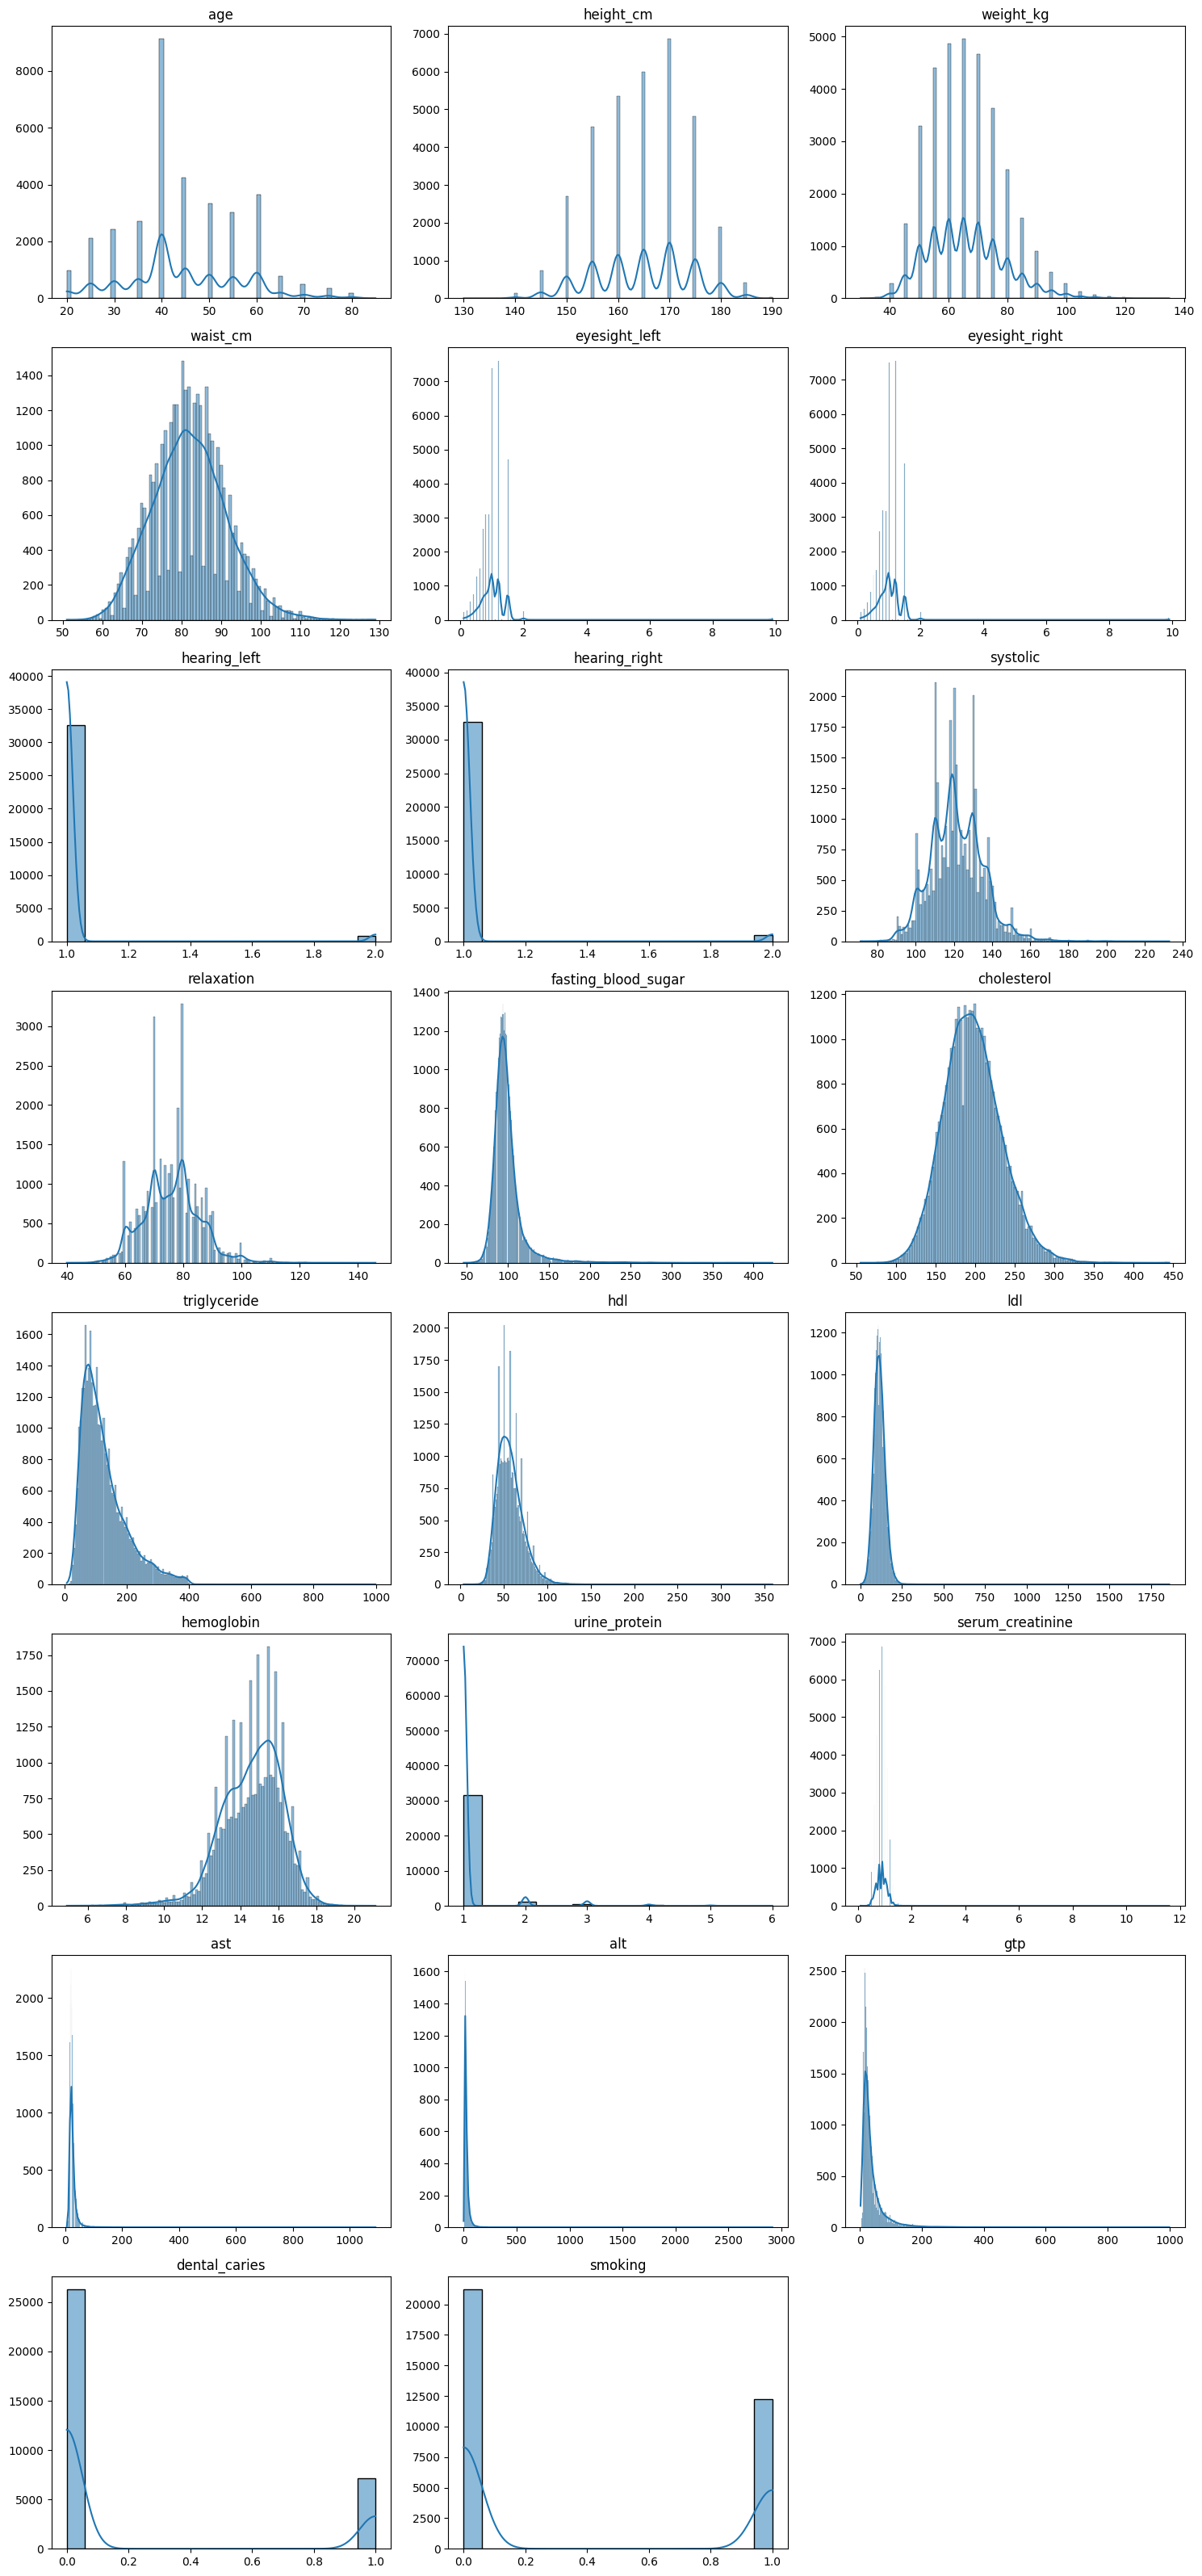

In [13]:
num_columns = data.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(num_columns)
rows = (num_plots // 3) + 1 if num_plots % 3 else num_plots // 3

plt.figure(figsize=(15, 4 * rows))

for i, column in enumerate(num_columns):
    plt.subplot(rows, 3, i + 1)
    sns.histplot(data[column], kde=True)
    plt.title(column)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.show()

Correlation between variables

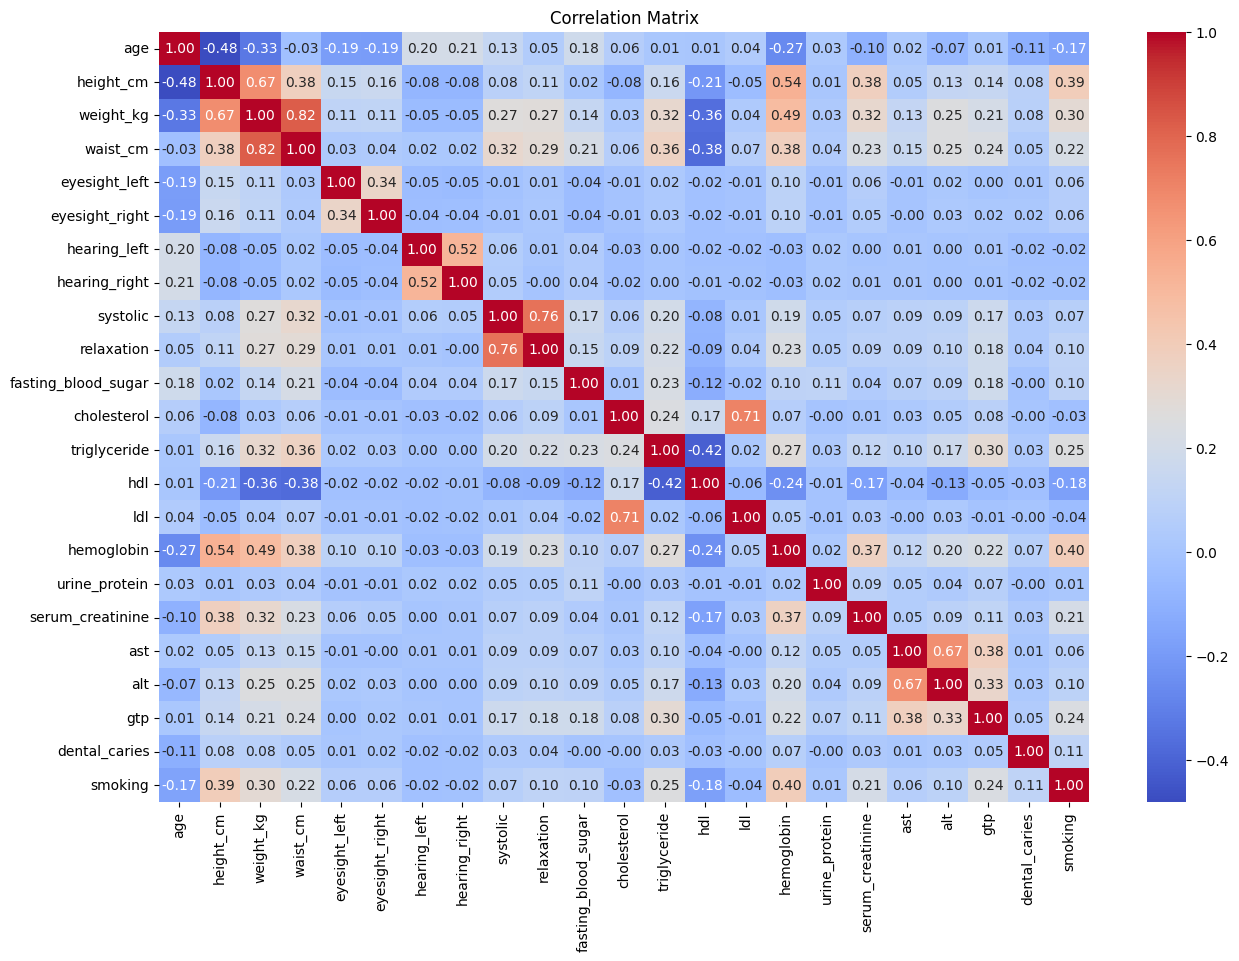

In [14]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Distribution of the Smoking target variable

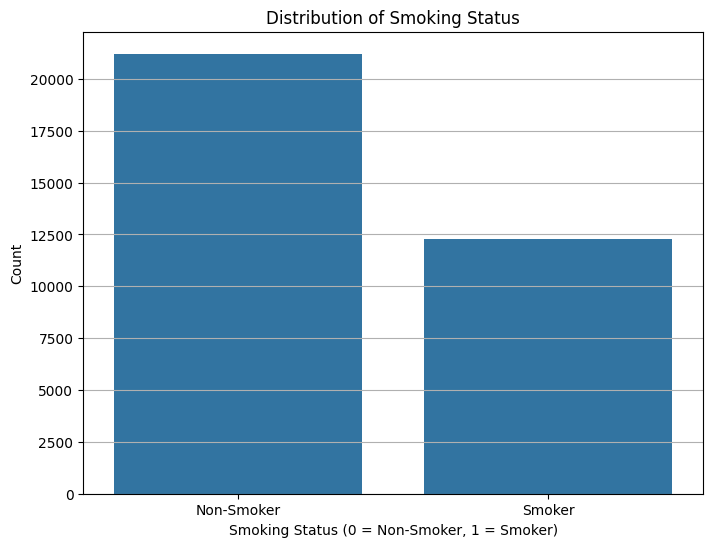

In [15]:
smoking_counts = data['smoking'].value_counts()

# Creating a bar plot for the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=smoking_counts.index, y=smoking_counts.values)
plt.title('Distribution of Smoking Status')
plt.xlabel('Smoking Status (0 = Non-Smoker, 1 = Smoker)')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.grid(axis='y')
plt.show()

Columns distributions against somking variable

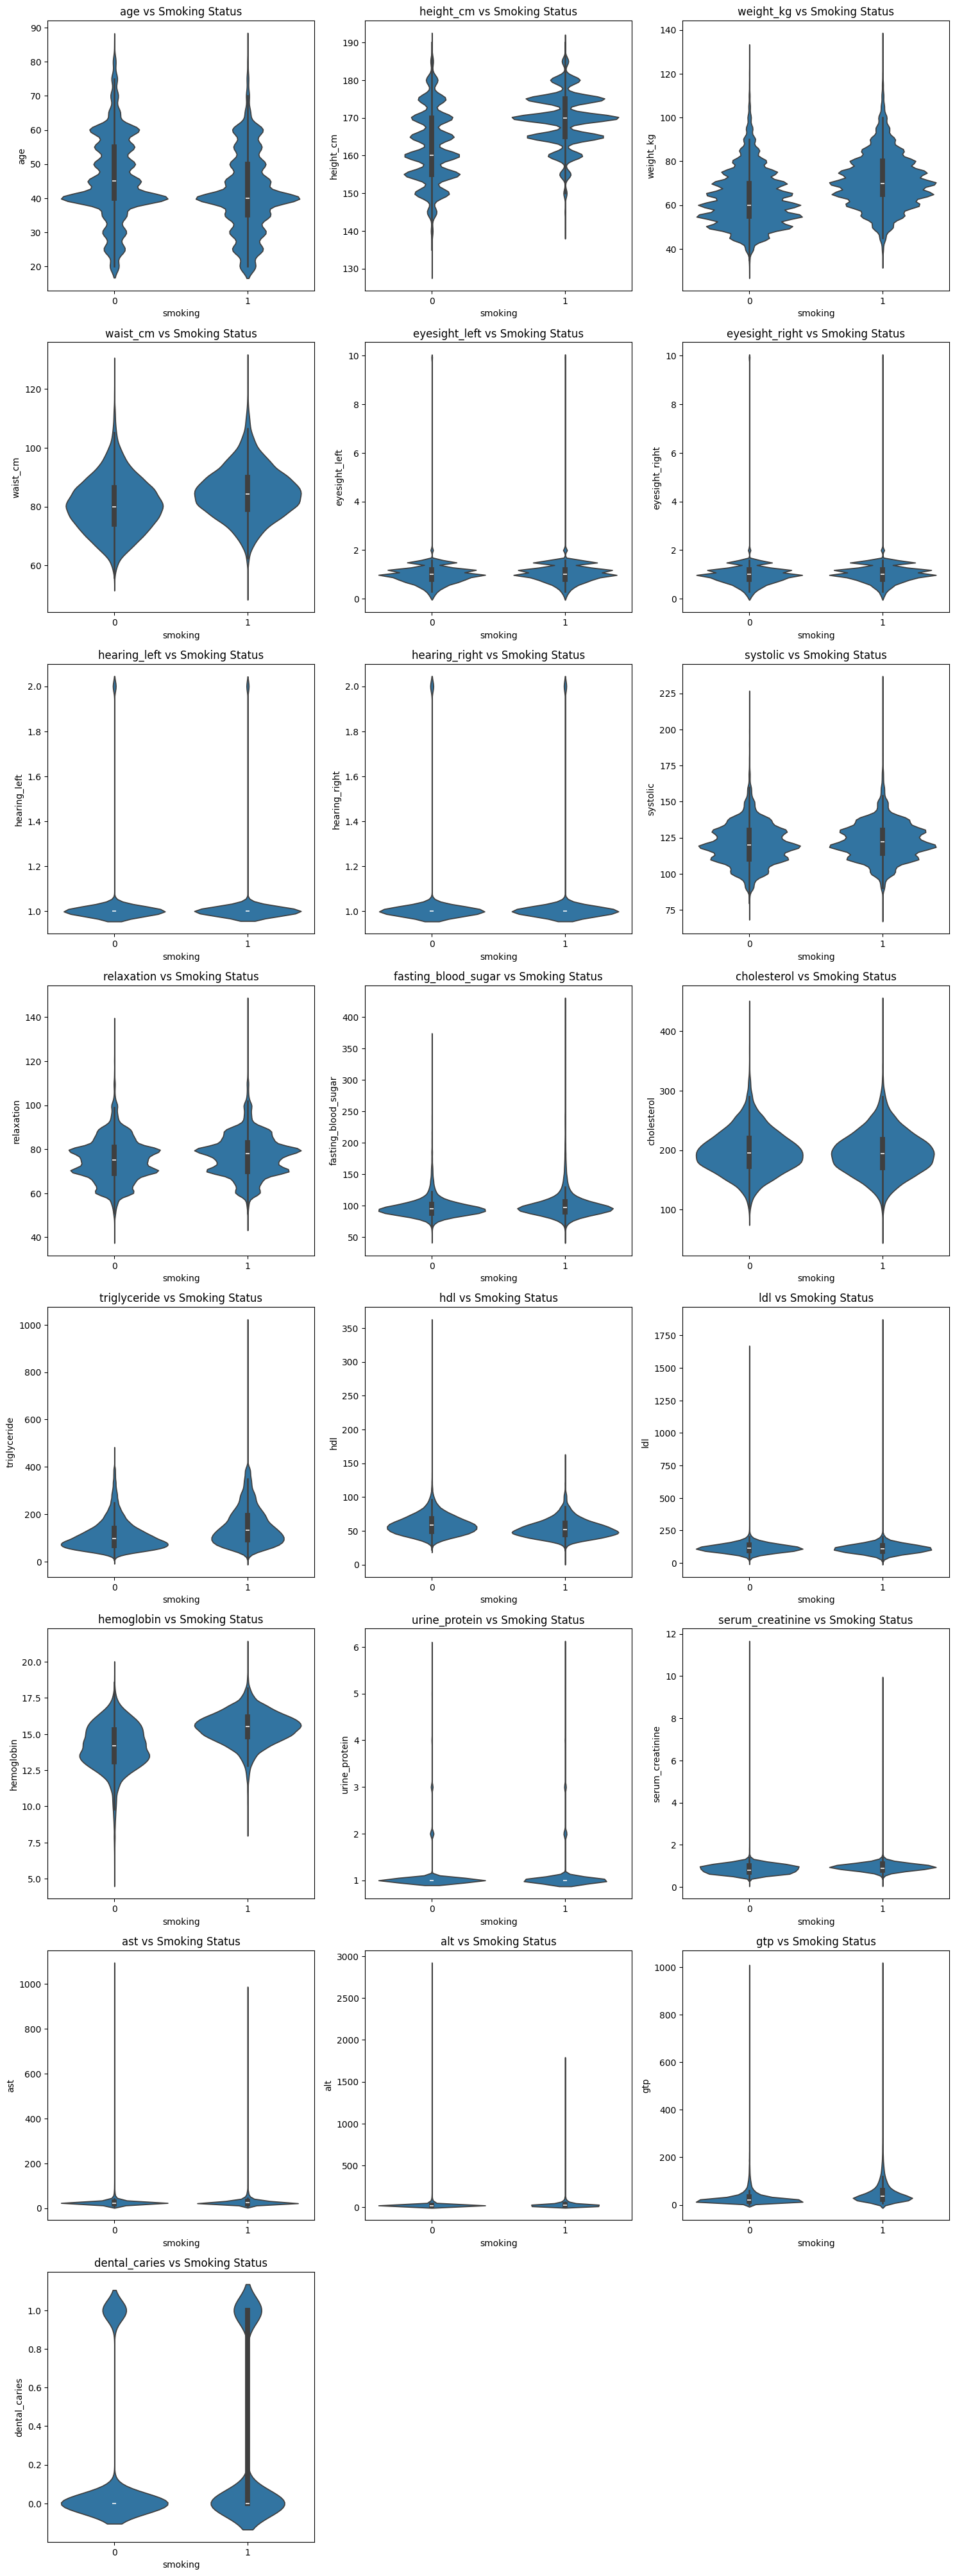

In [16]:
plt.figure(figsize=(15, 5 * len(data.columns[:-1])))
for i, variable in enumerate(data.columns[:-1], 1):
    plt.subplot(len(data.columns[:-1]), 3, i)
    sns.violinplot(x='smoking', y=variable, data=data)
    plt.title(f'{variable} vs Smoking Status')

plt.tight_layout()
plt.show()

Exploring how smoking correlates with other variables

In [17]:
correlation_with_smoking = data.corr()['smoking'].sort_values(ascending=False)

correlation_with_smoking

smoking                1.000000
hemoglobin             0.398321
height_cm              0.393353
weight_kg              0.298142
triglyceride           0.249482
gtp                    0.238014
waist_cm               0.222772
serum_creatinine       0.209042
dental_caries          0.106387
relaxation             0.104472
fasting_blood_sugar    0.097833
alt                    0.097347
systolic               0.070407
ast                    0.063507
eyesight_right         0.061988
eyesight_left          0.060057
urine_protein          0.013432
hearing_right         -0.018060
hearing_left          -0.023257
cholesterol           -0.029580
ldl                   -0.041953
age                   -0.167149
hdl                   -0.177394
Name: smoking, dtype: float64

## Setting up the validation framework

In [18]:
df_full_train, df_test = train_test_split(data, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.smoking.values
y_val = df_val.smoking.values
y_test = df_test.smoking.values

del df_train['smoking']
del df_val['smoking']
del df_test['smoking']

## Training models

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score


In [20]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=500),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "SVM": SVC(probability=True ,random_state=42)
}

In [21]:
models_columns = ['Model','ROC_AUC']
model_performance = pd.DataFrame(columns=models_columns)

for i, (name, model) in enumerate(models.items()):
    model.fit(df_train, y_train)
    val_predictions = model.predict_proba(df_val)[:,1]
    roc_auc = roc_auc_score(y_val, val_predictions)
    model_performance.loc[i] = [name, roc_auc]

model_performance

,Model,ROC_AUC
0,Random Forest,0.826255
1,Decision Tree,0.651537
2,Logistic Regression,0.793298
3,XGBoost,0.822318
4,SVM,0.809473


Random Forest and XGBoost have nearly similar AUC values, so let's work with them in order to decide which model will be used to deploy.

In [22]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(df_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(df_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [27]:
rf_preds = rf_model.predict_proba(df_val)[:,1]
xgb_preds = xgb_model.predict_proba(df_val)[:,1]

In [28]:
print(f"Random Forest ROC AUC value:{roc_auc_score(y_val, rf_preds)}")
print(f"XGBoost ROC AUC value:{roc_auc_score(y_val, xgb_preds)}")

Random Forest ROC AUC value:0.8262553349836408
XGBoost ROC AUC value:0.8223175704666696


Feature importance in both models

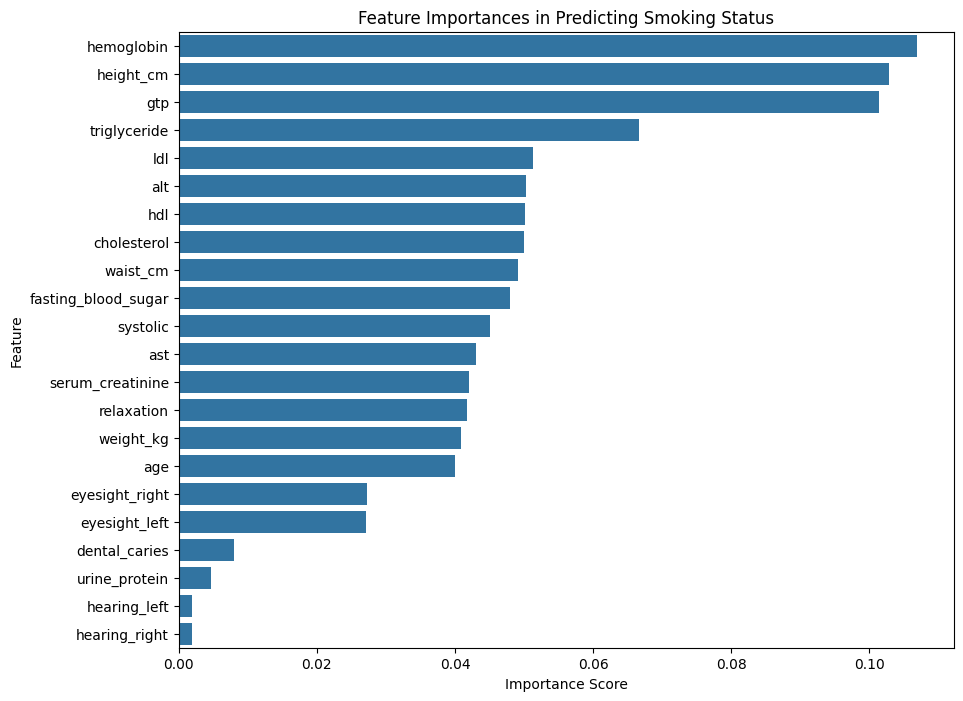

In [30]:
feature_importances = rf_model.feature_importances_
features = df_train.columns

importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances in Predicting Smoking Status')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

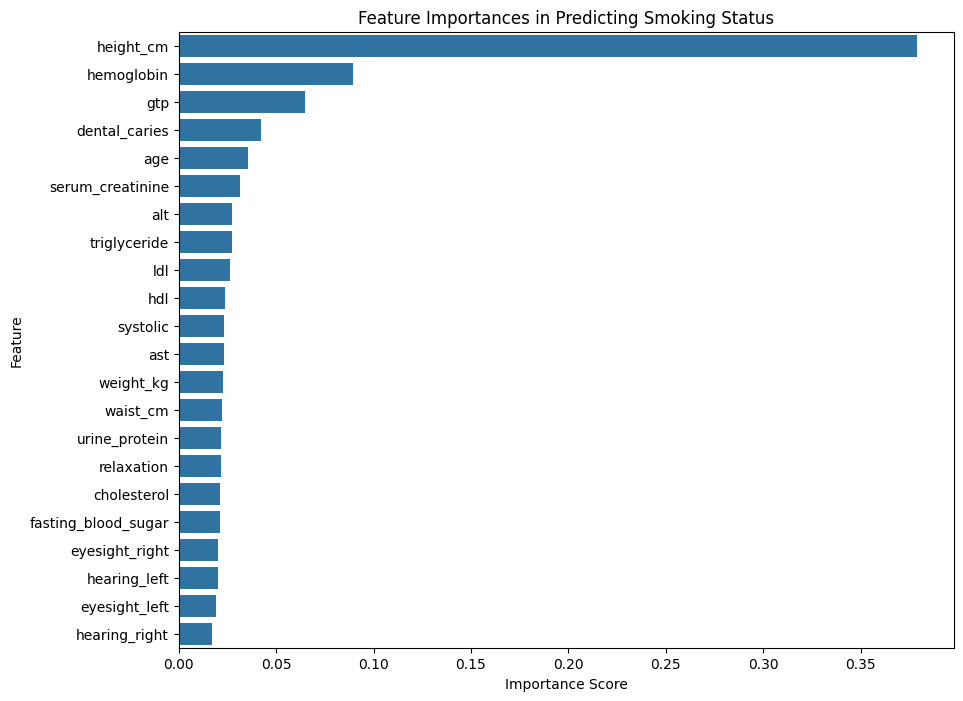

In [31]:
feature_importances = xgb_model.feature_importances_
features = df_train.columns

importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

importances_df = importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importances in Predicting Smoking Status')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

## Tunning Models

In [34]:
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

In [35]:
rf_params = {'n_estimators': [5,20,50,100],
             'max_features':  ['auto', 'sqrt'],
             'max_depth': [int(x) for x in np.linspace(10, 120, num = 12)],
             'min_samples_split': range(2,10,2),
             'min_samples_leaf': range(2,10,2),
             'bootstrap': [True, False] 
             }

rf_tunning = RandomForestClassifier()

rf_random = RandomizedSearchCV(rf_tunning,
                               param_distributions = rf_params,
                               n_iter = 100, 
                               cv = 5, 
                               verbose=2, 
                               random_state=42, 
                               n_jobs = -1,
                               scoring='roc_auc')

rf_random.fit(df_train, y_train)

print("Best set of hyperparameters: ", rf_random.best_params_)
print("Best score: ", rf_random.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best set of hyperparameters:  {'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 8, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Best score:  0.8271714794126963


In [36]:
xgb_params = {'max_depth': stats.randint(3, 20),
              'learning_rate': stats.uniform(0.01, 0.1),
              'colsample_bytree': stats.uniform(0.01, 0.1),
              'gamma': stats.uniform(0.01, 0.1),
              'subsample': stats.uniform(0.5, 0.5),
              'n_estimators':stats.randint(50, 500),
              'min_child_weight': stats.randint(3, 20), 
              'reg_alpha': stats.uniform(0.1, 1), 
              'reg_lambda': stats.uniform(0.1, 1)
              }

xgb_tunning = XGBClassifier()

xgb_random = RandomizedSearchCV(xgb_tunning, 
                                   param_distributions = xgb_params, 
                                   n_iter = 100, 
                                   cv = 5, 
                                   verbose=2, 
                                    random_state=42, 
                                    n_jobs = -1,
                                   scoring='roc_auc')
xgb_random.fit(df_train, y_train)

print("Best set of hyperparameters: ", xgb_random.best_params_)
print("Best score: ", xgb_random.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best set of hyperparameters:  {'colsample_bytree': 0.09721239089441515, 'gamma': 0.10321182824836124, 'learning_rate': 0.0665133183589209, 'max_depth': 6, 'min_child_weight': 7, 'n_estimators': 425, 'reg_alpha': 0.12302260478763752, 'reg_lambda': 0.7513672109882461, 'subsample': 0.8856233342598689}
Best score:  0.8220265285659545


In [42]:
tunned_rf = RandomForestClassifier(**rf_random.best_params_, random_state=42)
tunned_rf.fit(df_train, y_train)
tunned_rf_preds = tunned_rf.predict_proba(df_val)[:,1]
roc_auc_rf = roc_auc_score(y_val, tunned_rf_preds)

In [44]:
tunned_xgb = XGBClassifier(**xgb_random.best_params_, random_state=42)
tunned_xgb.fit(df_train, y_train)
tunned_xgb_preds = tunned_xgb.predict_proba(df_val)[:,1]
roc_auc_xgb = roc_auc_score(y_val, tunned_xgb_preds)

In [45]:
print(f"Tunned Random Forest ROC AUC value: {roc_auc_rf}")
print(f"Tunned XGBoost ROC AUC value: {roc_auc_xgb}")

Tunned Random Forest ROC AUC value: 0.830010275408953
Tunned XGBoost ROC AUC value: 0.8265487319353823


Choosen model is Random Forest